In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ensembler_functions as ef
plt.rcParams['axes.linewidth'] = 2.5
import os
import h5py

2025-02-20 16:28:31.493011: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 16:28:31.742288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Study AD score distributions in different regions

In [2]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": "Retry training with overlap removal"
}

training_info = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_125", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 10, 
    "training_weights": True,
    "obj_type": 'HLT',
    "overlap_removal": False
}

datasets, region_counts = ef.load_and_inference(
    training_info=training_info,
    data_info=data_info,
    target_rate=10,
    L1AD_rate=1000,
    obj_type='HLT',
    save_version='1',
    tag='all'
)

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/ZZ4lep.h5
Lo

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


l1Seeded:::
HLTAD_pure_rate: 9.886472704799399
HLTAD_total_rate: 43.75702865614023
HLTAD_threshold: 11.60262393951416



2025-02-19 19:18:35.460411: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-19 19:18:35.535410: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-19 19:18:35.535725: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

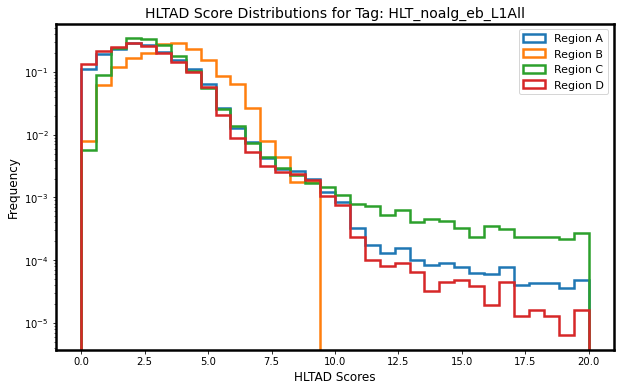

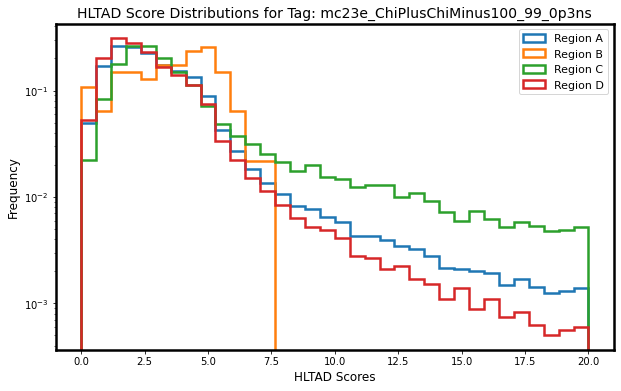

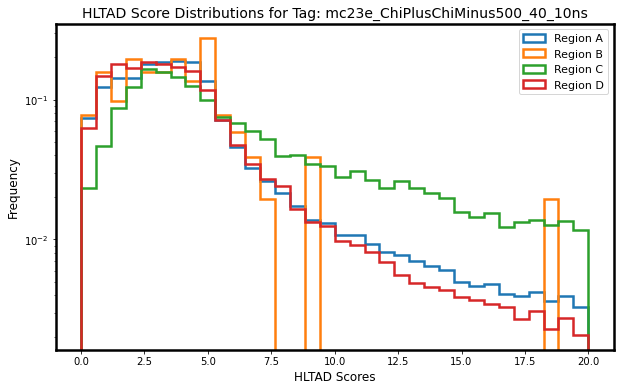

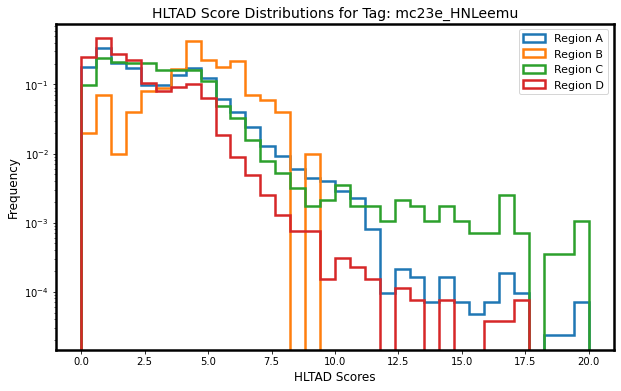

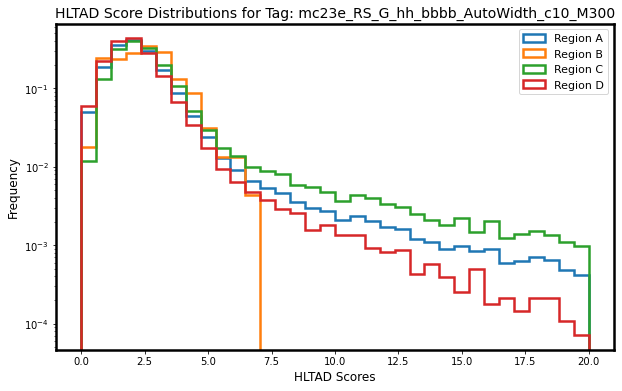

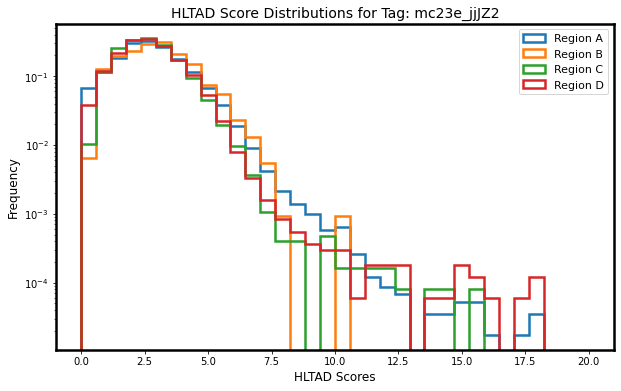

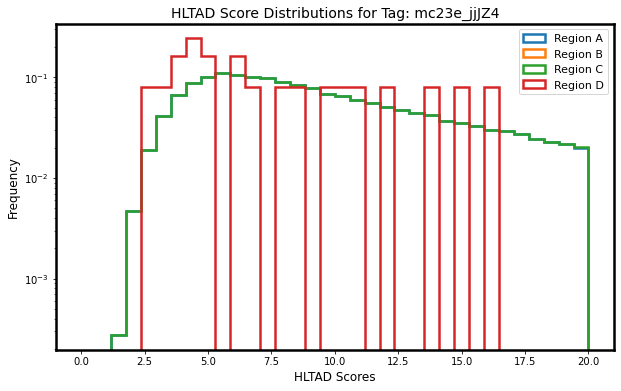

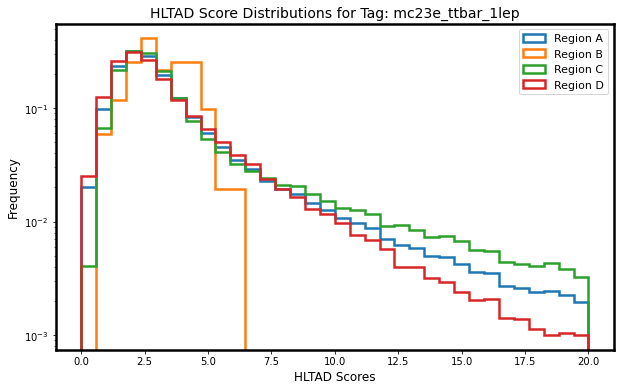

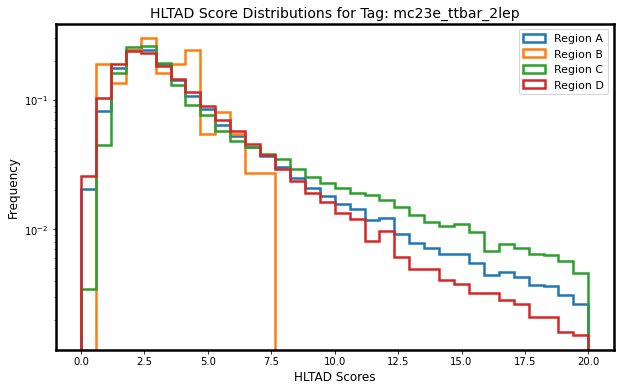

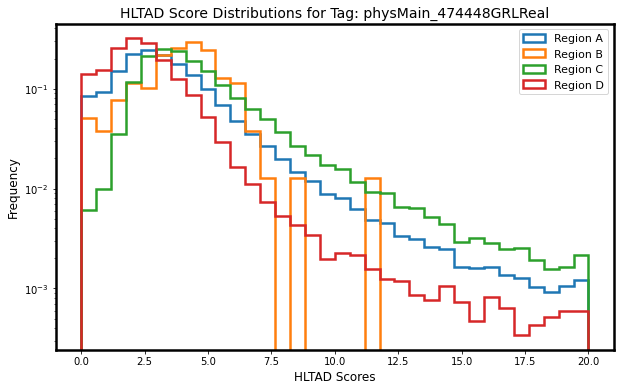

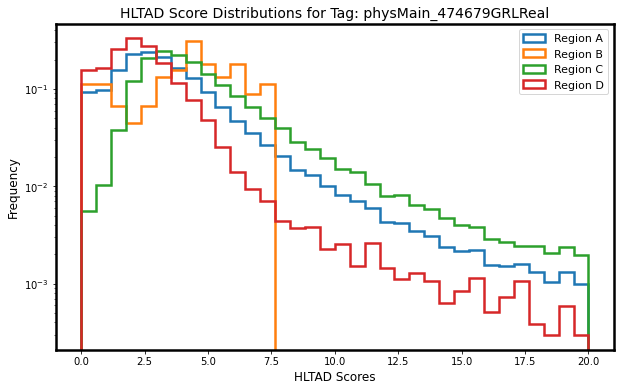

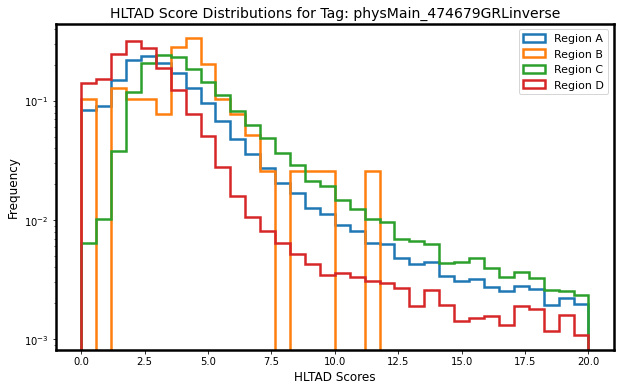

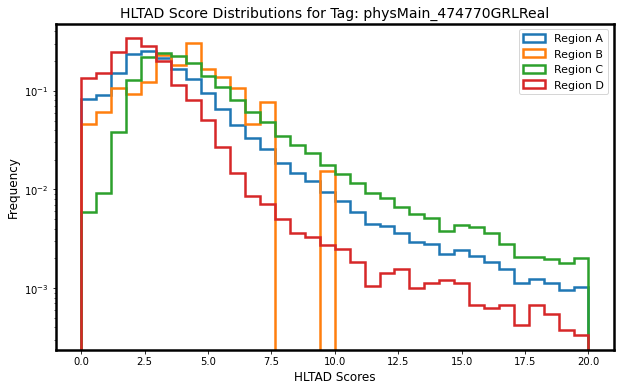

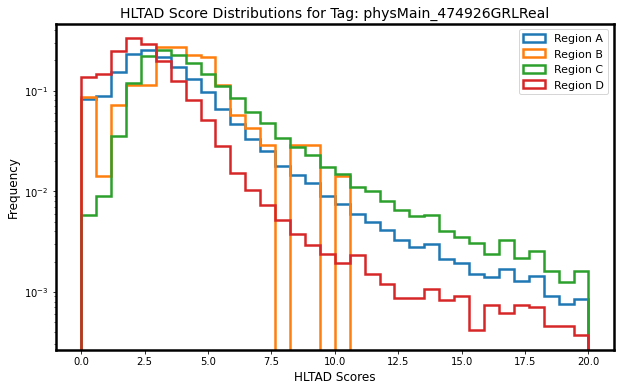

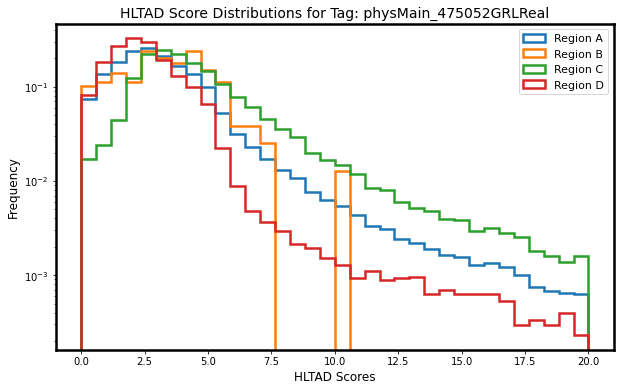

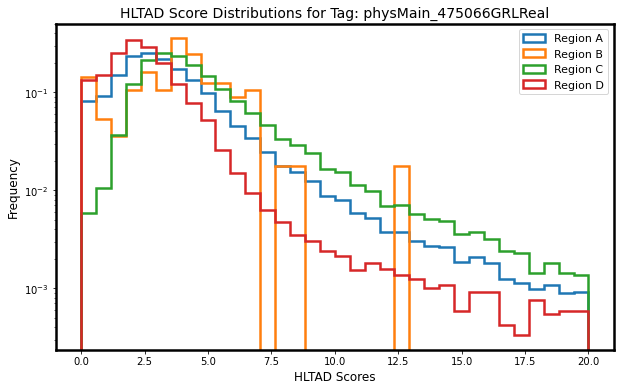

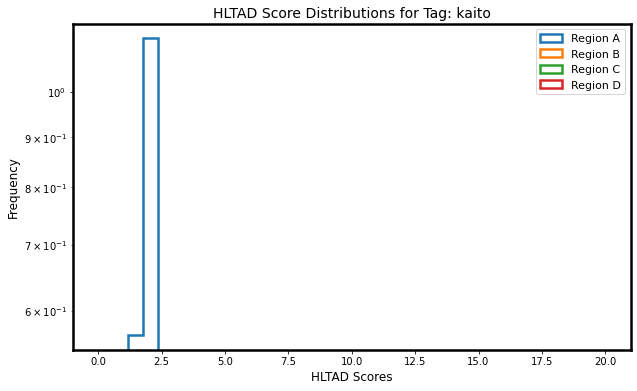

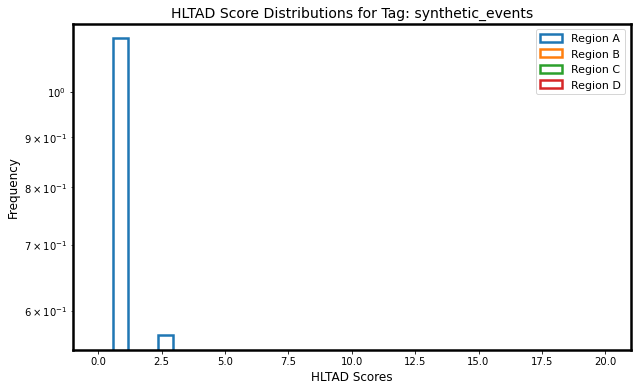

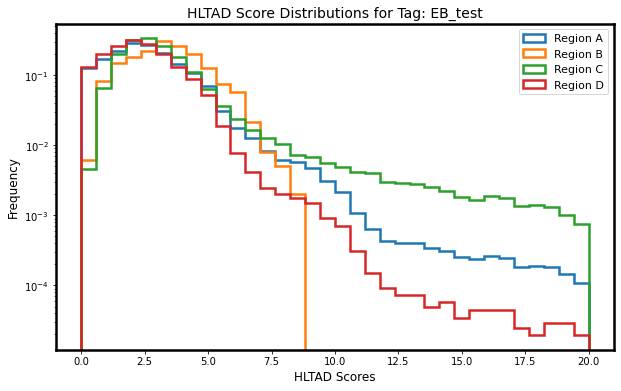

In [28]:
bins=np.linspace(0, 20, 35)
for tag, data_dict in datasets.items():

    if 'region_labels' not in data_dict: continue


    A_mask = ['A' in label for label in data_dict['region_labels']]
    B_mask = ['B' in label for label in data_dict['region_labels']]
    C_mask = ['C' in label for label in data_dict['region_labels']]
    D_mask = ['D' in label for label in data_dict['region_labels']]
    E_mask = ['E' in label for label in data_dict['region_labels']]
    F_mask = ['F' in label for label in data_dict['region_labels']]
    G_mask = ['G' in label for label in data_dict['region_labels']]

    A_scores = data_dict['HLT_AD_scores'][A_mask]
    B_scores = data_dict['HLT_AD_scores'][B_mask]
    C_scores = data_dict['HLT_AD_scores'][C_mask]
    D_scores = data_dict['HLT_AD_scores'][D_mask]
    E_scores = data_dict['HLT_AD_scores'][E_mask]
    F_scores = data_dict['HLT_AD_scores'][F_mask]
    G_scores = data_dict['HLT_AD_scores'][G_mask]


    regions = {
        'A': A_scores[A_scores>0],
        'B': B_scores[B_scores>0],
        'C': C_scores[C_scores>0],
        'D': D_scores[D_scores>0]
    }

    # Plot histograms for each region on the same plot
    plt.figure(figsize=(10, 6))
    for region, scores in regions.items():
        plt.hist(scores, bins=bins, label=f'Region {region}', 
                 density=True, histtype='step', linewidth=2.5, fill=False)
    
    plt.title(f'HLTAD Score Distributions for Tag: {tag}', fontsize=14)
    plt.xlabel('HLTAD Scores', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=11)
    plt.yscale('log')
    plt.show()

HLT_noalg_eb_L1All


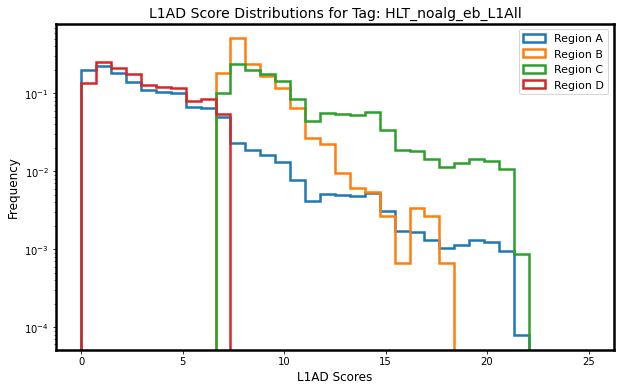

mc23e_ChiPlusChiMinus100_99_0p3ns


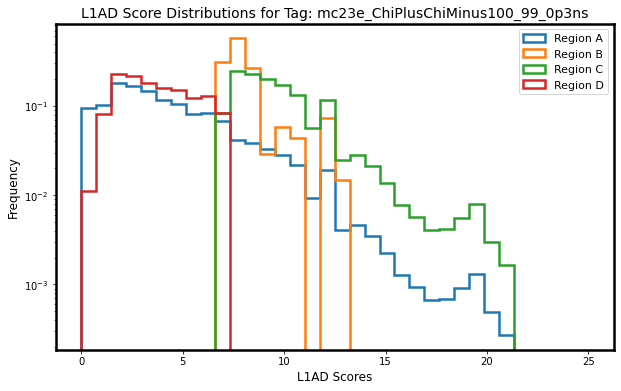

mc23e_ChiPlusChiMinus500_40_10ns


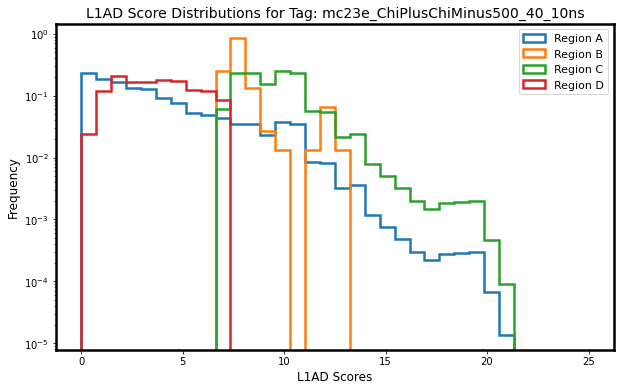

mc23e_HNLeemu


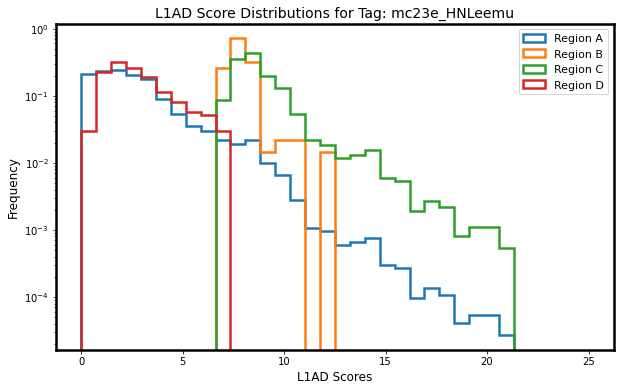

mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300


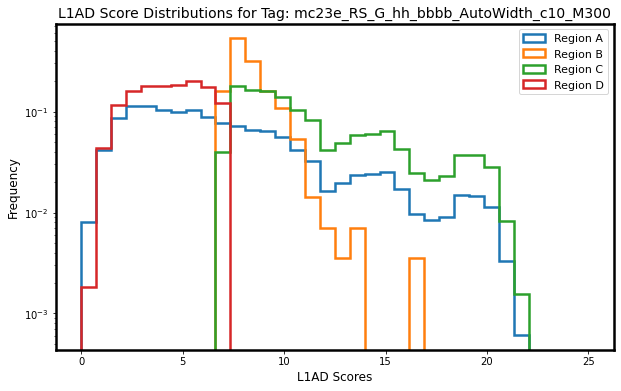

mc23e_jjJZ2


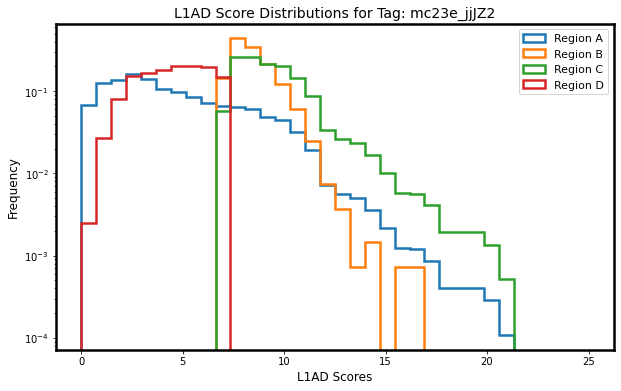

mc23e_jjJZ4


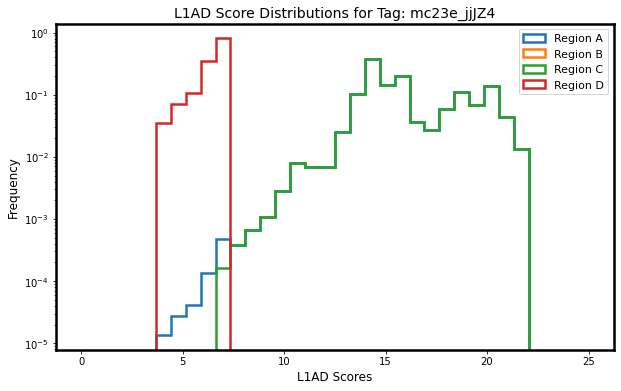

mc23e_ttbar_1lep


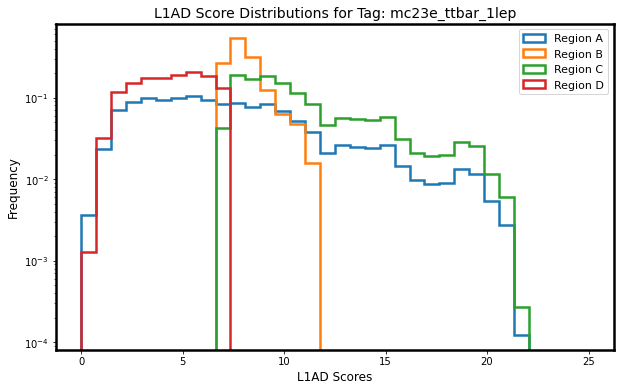

mc23e_ttbar_2lep


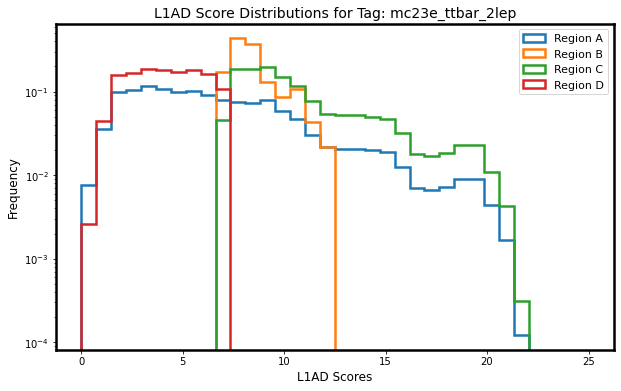

physMain_474448GRLReal


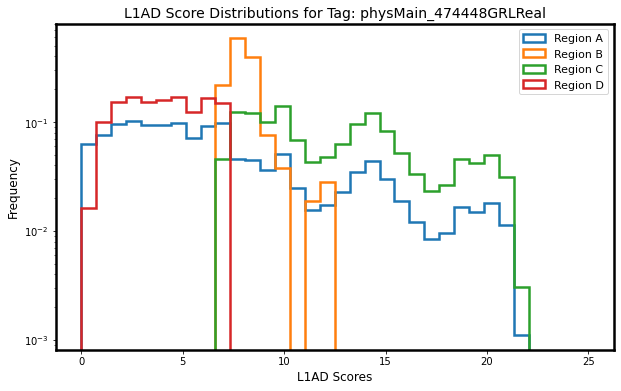

physMain_474679GRLReal


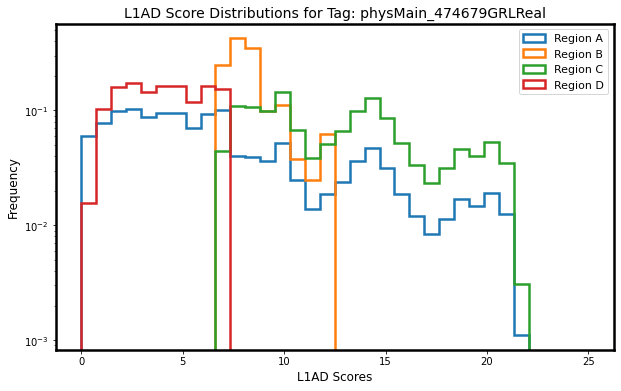

physMain_474679GRLinverse


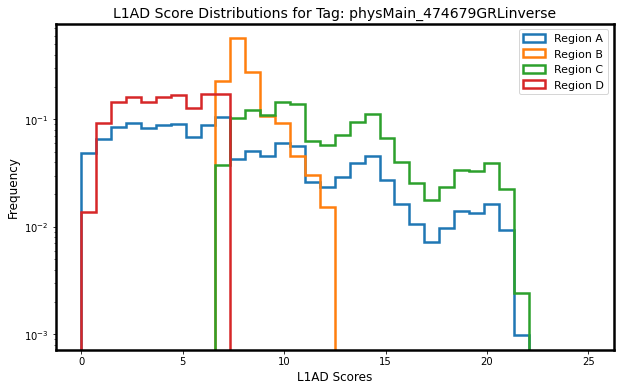

physMain_474770GRLReal


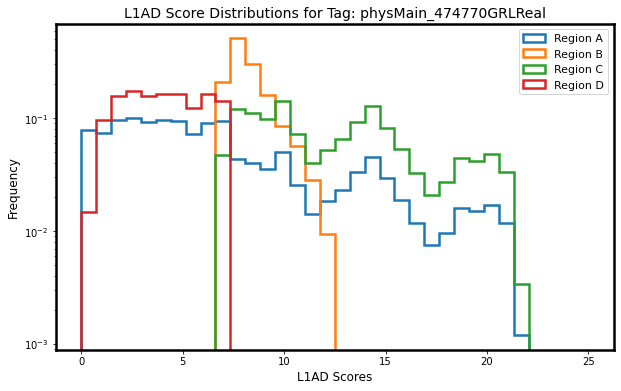

physMain_474926GRLReal


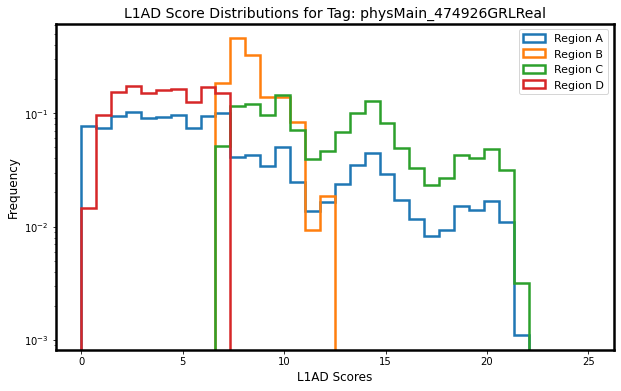

physMain_475052GRLReal


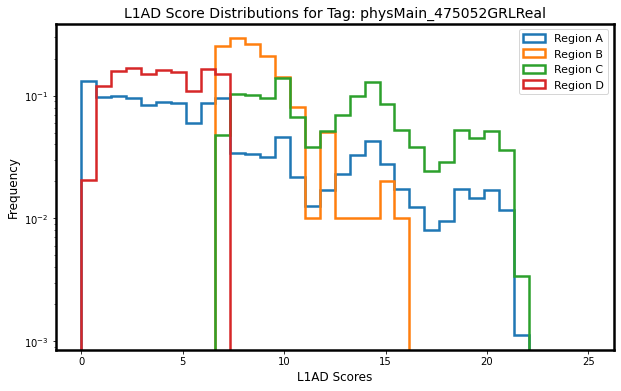

physMain_475066GRLReal


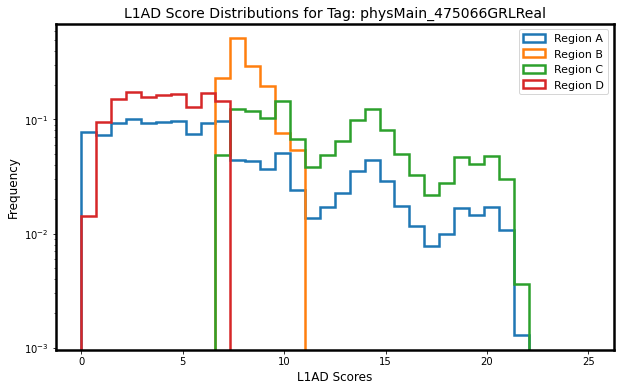

kaito


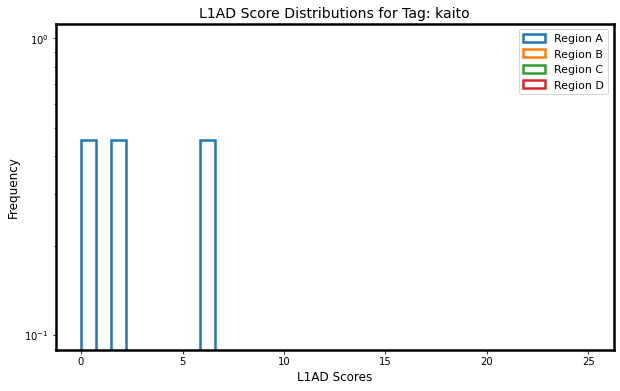

EB_test


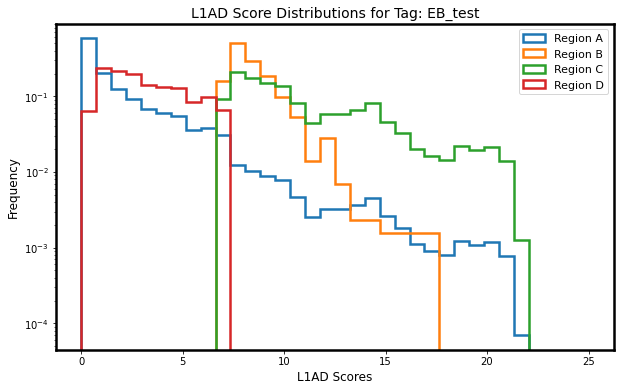

In [29]:
bins=np.linspace(0, 25, 35)
for tag, data_dict in datasets.items():

    if 'region_labels' not in data_dict: continue
    if tag == 'synthetic_events': continue

    print(tag)
    A_mask = ['A' in label for label in data_dict['region_labels']]
    B_mask = ['B' in label for label in data_dict['region_labels']]
    C_mask = ['C' in label for label in data_dict['region_labels']]
    D_mask = ['D' in label for label in data_dict['region_labels']]
    E_mask = ['E' in label for label in data_dict['region_labels']]
    F_mask = ['F' in label for label in data_dict['region_labels']]
    G_mask = ['G' in label for label in data_dict['region_labels']]

    A_scores = data_dict['topo2A_AD_scores'][A_mask]
    B_scores = data_dict['topo2A_AD_scores'][B_mask]
    C_scores = data_dict['topo2A_AD_scores'][C_mask]
    D_scores = data_dict['topo2A_AD_scores'][D_mask]
    E_scores = data_dict['topo2A_AD_scores'][E_mask]
    F_scores = data_dict['topo2A_AD_scores'][F_mask]
    G_scores = data_dict['topo2A_AD_scores'][G_mask]


    regions = {
        'A': A_scores[A_scores>0],
        'B': B_scores[B_scores>0],
        'C': C_scores[C_scores>0],
        'D': D_scores[D_scores>0]
    }

    # Plot histograms for each region on the same plot
    plt.figure(figsize=(10, 6))
    for region, scores in regions.items():
        plt.hist(scores, bins=bins, label=f'Region {region}', 
                 density=True, histtype='step', linewidth=2.5, fill=False)
    
    plt.title(f'L1AD Score Distributions for Tag: {tag}', fontsize=14)
    plt.xlabel('L1AD Scores', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=11)
    plt.yscale('log')
    plt.show()

### Study AD score distributions of zerobias

In [3]:
datasets = {}

# GRLReal
GRL_real_tags = []
data_path = '/eos/home-m/mmcohen/ntuples/01-30-2025/ZeroBias/'

for filename in os.listdir(data_path):

    dataset_tag = filename.split('_01-30')[0]
    GRL_real_tags.append(dataset_tag)
    
    with h5py.File(data_path+filename, 'r') as hf:
        HLT_jets = hf['HLT_jets'][:]
        L1_jFexSR_jets = hf['L1_jFexSR_jets'][:]
        L1_jFexLR_jets = hf['L1_jFexLR_jets'][:]
        HLT_electrons = hf['HLT_electrons'][:]
        LRT_electrons = hf['LRT_electrons'][:]
        L1_egammas = hf['L1_egammas'][:]
        HLT_muons = hf['HLT_muons'][:]
        LRT_muons = hf['LRT_muons'][:]
        L1_muons = hf['L1_muons'][:]
        L1_eFex_taus = hf['L1_eFex_taus'][:]
        L1_jFex_taus = hf['L1_jFex_taus'][:]
        HLT_photons = hf['HLT_photons'][:]
        HLT_MET = hf['HLT_MET'][:].reshape(-1, 1, 3)  # Broadcasting MET
        L1_MET = hf['L1_MET'][:].reshape(-1, 1, 3)
        pass_L1_unprescaled = hf["pass_L1_unprescaled"][:]
        pass_HLT_unprescaled = hf["pass_HLT_unprescaled"][:]
        event_number = hf["event_number"][:]
        run_number = hf["run_number"][:]
        mu = hf["mu"][:]

        HLT_objects = np.concatenate([HLT_jets[:, :6, [0, 2, 3]], HLT_electrons[:, :3, :], HLT_muons[:, :3, :], HLT_photons[:, :3, :], HLT_MET], axis=1)
        L1_objects = np.concatenate([L1_jFexSR_jets[:, :6, :], L1_egammas[:, :3, :], L1_muons[:, :3, :], L1_eFex_taus[:, :3, :], L1_MET], axis=1)
        
        datasets[dataset_tag] = {
            'HLT_data': HLT_objects,
            'L1_data': L1_objects,
            'passL1': pass_L1_unprescaled==1,
            'passHLT': pass_HLT_unprescaled==1,
            'weights': np.ones(len(HLT_objects)),
            'event_numbers': event_number,
            'run_numbers': run_number,
            'pileups': mu
        }

datasets = ef.combine_data(datasets, tags_to_combine=GRL_real_tags, new_tag='GRL_real')

# GRLInverse
data_path = '/eos/home-m/mmcohen/ntuples/01-30-2025/ZeroBias_GRLInverse/'
GRL_inverse_tags = []

for filename in os.listdir(data_path):

    dataset_tag = filename.split('_01-30')[0]
    GRL_inverse_tags.append(dataset_tag)
    
    with h5py.File(data_path+filename, 'r') as hf:
        HLT_jets = hf['HLT_jets'][:]
        L1_jFexSR_jets = hf['L1_jFexSR_jets'][:]
        L1_jFexLR_jets = hf['L1_jFexLR_jets'][:]
        HLT_electrons = hf['HLT_electrons'][:]
        LRT_electrons = hf['LRT_electrons'][:]
        L1_egammas = hf['L1_egammas'][:]
        HLT_muons = hf['HLT_muons'][:]
        LRT_muons = hf['LRT_muons'][:]
        L1_muons = hf['L1_muons'][:]
        L1_eFex_taus = hf['L1_eFex_taus'][:]
        L1_jFex_taus = hf['L1_jFex_taus'][:]
        HLT_photons = hf['HLT_photons'][:]
        HLT_MET = hf['HLT_MET'][:].reshape(-1, 1, 3)  # Broadcasting MET
        L1_MET = hf['L1_MET'][:].reshape(-1, 1, 3)
        pass_L1_unprescaled = hf["pass_L1_unprescaled"][:]
        pass_HLT_unprescaled = hf["pass_HLT_unprescaled"][:]
        event_number = hf["event_number"][:]
        run_number = hf["run_number"][:]
        mu = hf["mu"][:]

        HLT_objects = np.concatenate([HLT_jets[:, :6, [0, 2, 3]], HLT_electrons[:, :3, :], HLT_muons[:, :3, :], HLT_photons[:, :3, :], HLT_MET], axis=1)
        L1_objects = np.concatenate([L1_jFexSR_jets[:, :6, :], L1_egammas[:, :3, :], L1_muons[:, :3, :], L1_eFex_taus[:, :3, :], L1_MET], axis=1)
        
        datasets[dataset_tag] = {
            'HLT_data': HLT_objects,
            'L1_data': L1_objects,
            'passL1': pass_L1_unprescaled==1,
            'passHLT': pass_HLT_unprescaled==1,
            'weights': np.ones(len(HLT_objects)),
            'event_numbers': event_number,
            'run_numbers': run_number,
            'pileups': mu
        }

datasets = ef.combine_data(datasets, tags_to_combine=GRL_inverse_tags, new_tag='GRL_inverse')

In [7]:
for tag, dict in datasets.items():
        for label, data in dict.items():
            if label.endswith('data'):
                datasets[tag][label] = np.reshape(data, newshape=(-1, 48))

In [8]:
for tag, data_dict in datasets.items():
    print(f'{tag}:')
    for key, value in data_dict.items():
        print(f'    {key}: {value.shape}')

GRL_real:
    HLT_data: (3805337, 48)
    L1_data: (3805337, 48)
    passL1: (3805337,)
    passHLT: (3805337,)
    weights: (3805337,)
    event_numbers: (3805337,)
    run_numbers: (3805337,)
    pileups: (3805337,)
GRL_inverse:
    HLT_data: (53024, 48)
    L1_data: (53024, 48)
    passL1: (53024,)
    passHLT: (53024,)
    weights: (53024,)
    event_numbers: (53024,)
    run_numbers: (53024,)
    pileups: (53024,)


In [9]:
# Load the model
HLT_AE, HLT_encoder, HLT_MSE_AE, HLT_preprocessing_model = ef.initialize_model(
        input_dim=datasets['GRL_real']['HLT_data'].shape[1],
        pt_thresholds=[50, 30, 30, 30],
        pt_scale_factor=0.05,
        dropout_p=0.1,
        L2_reg_coupling=0.01,
        latent_dim=4,
        #large_network=large_network,
        saved_model_path='/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_125',
        save_version=1,
        obj_type='HLT',
        pt_normalization_type='global_division',
        overlap_removal=False
    )

In [10]:
# Pass the data through the model
for tag, data_dict in datasets.items():
    data_dict['HLT_preprocessed_data'] = HLT_preprocessing_model.predict(data_dict['HLT_data'], verbose=0, batch_size=8)
    data_dict['HLT_AD_scores'] = HLT_MSE_AE.predict(data_dict['HLT_preprocessed_data'], batch_size=8, verbose=0)



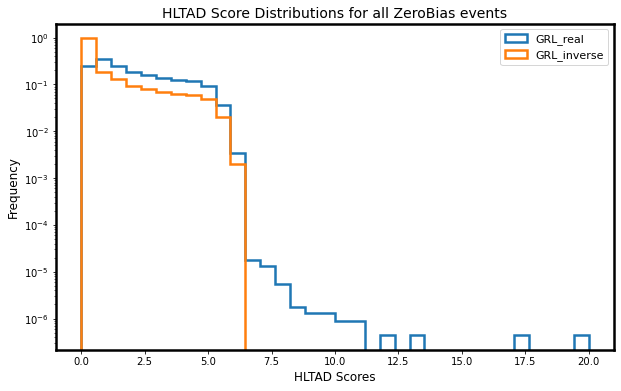

In [23]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():


    plt.hist(data_dict['HLT_AD_scores'], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for all ZeroBias events', fontsize=14)
plt.xlabel('HLTAD Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

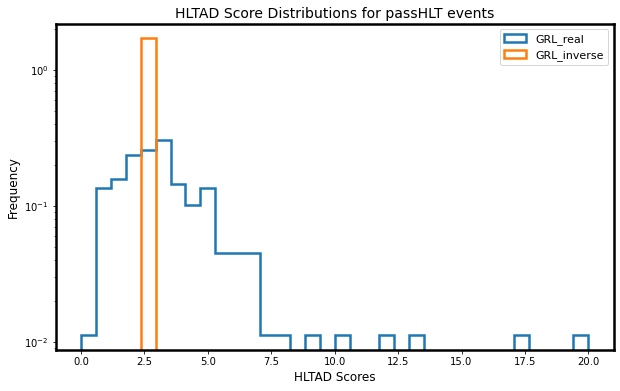

In [21]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():

    
    plt.hist(data_dict['HLT_AD_scores'][data_dict['passHLT']], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for passHLT events', fontsize=14)
plt.xlabel('HLTAD Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()

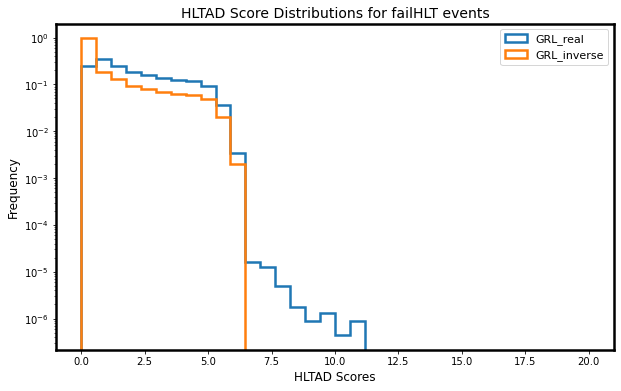

In [22]:
bins = np.linspace(0, 20, 35)
plt.figure(figsize=(10, 6))
for tag, data_dict in datasets.items():

    
    plt.hist(data_dict['HLT_AD_scores'][~data_dict['passHLT']], bins=bins, density=True, histtype='step', linewidth=2.5, fill=False, label=tag)
    
plt.title(f'HLTAD Score Distributions for failHLT events', fontsize=14)
plt.xlabel('HLTAD Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()